**Project Scenario:**
An international firm that is looking to expand its business in different countries across the world has recruited you. You have been hired as a junior Data Engineer and are tasked with creating a script that can extract the list of the top 10 largest economies of the world in descending order of their GDPs in Billion USD (rounded to 2 decimal places), as logged by the International Monetary Fund (IMF).

The required data seems to be available on the URL mentioned below:
https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29


In [ ]:
!pip install numpy pandas
!pip install lxml #(Dealing with xml html documents)

In [ ]:
import pandas as pd
import numpy as np

Extract tables from webpage using Pandas.

Retain table number 3 as the required dataframe.

Replace the column headers with column numbers
df.columns = range(df.shape[1])

Retain columns with index 0 and 2 (name of country and value of GDP quoted by IMF)

Retain the Rows with index 1 to 10, indicating the top 10 economies of the world.

Assign column names as "Country" and "GDP (Million USD)"




In [ ]:
url="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"
tables=pd.read_html(url)
df=tables[3]


In [ ]:
df

Country/Territory UN region IMF[1][13]            World Bank[14]  \
    Country/Territory UN region   Estimate       Year       Estimate   
0               World         —  105568776       2023      100562011   
1       United States  Americas   26854599       2023       25462700   
2               China      Asia   19373586  [n 1]2023       17963171   
3               Japan      Asia    4409738       2023        4231141   
4             Germany    Europe    4308854       2023        4072192   
..                ...       ...        ...        ...            ...   
209          Anguilla  Americas          —          —              —   
210          Kiribati   Oceania        248       2023            223   
211             Nauru   Oceania        151       2023            151   
212        Montserrat  Americas          —          —              —   
213            Tuvalu   Oceania         65       2023             60   

               United Nations[15]             
          Year           Estimate       Year  
0         2022           96698005       2021  
1         2022           23315081       2021  
2    [n 3]2022           17734131  [n 1]2021  
3         2022            4940878       2021  
4         2022            4259935       2021  
..         ...                ...        ...  
209          —                303       2021  
210       2022                227       2021  
211       2022                155       2021  
212          —                 72       2021  
213       2022                 60       2021  

[214 rows x 8 columns]

In [ ]:
df.columns=range(df.shape[1])

In [ ]:
print(df.columns)

RangeIndex(start=0, stop=8, step=1)


In [ ]:
df

,0,1,2,3,4,5,6,7
0,World,—,105568776,2023,100562011,2022,96698005,2021
1,United States,Americas,26854599,2023,25462700,2022,23315081,2021
2,China,Asia,19373586,[n 1]2023,17963171,[n 3]2022,17734131,[n 1]2021
3,Japan,Asia,4409738,2023,4231141,2022,4940878,2021
4,Germany,Europe,4308854,2023,4072192,2022,4259935,2021
...,...,...,...,...,...,...,...,...
209,Anguilla,Americas,—,—,—,—,303,2021
210,Kiribati,Oceania,248,2023,223,2022,227,2021
211,Nauru,Oceania,151,2023,151,2022,155,2021
212,Montserrat,Americas,—,—,—,—,72,2021


In [ ]:
df=df[[0,2]]
df

,0,2
0,World,105568776
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
...,...,...
209,Anguilla,—
210,Kiribati,248
211,Nauru,151
212,Montserrat,—


In [ ]:
df = df.iloc[1:11,:]

In [ ]:
df

,0,2
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882
6,United Kingdom,3158938
7,France,2923489
8,Italy,2169745
9,Canada,2089672
10,Brazil,2081235


In [ ]:
df.columns = ["Country", "GDP (Million USD)"]

In [ ]:
df

,Country,GDP (Million USD)
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882
6,United Kingdom,3158938
7,France,2923489
8,Italy,2169745
9,Canada,2089672
10,Brazil,2081235


Modify the GDP column of the DataFrame, converting the value available in Million USD to Billion USD. Use the round() method of Numpy library to round the value to 2 decimal places. Modify the header of the DataFrame to GDP (Billion USD)

In [ ]:
df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)
df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000
df[['GDP (Million USD)']] = np.round(df[['GDP (Million USD)']],4)
df.rename(columns={'GDP (Million USD)':'GDP (Billion USD)'})

<ipython-input-101-1ff91e11f438>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GDP (Million USD)'] = df['GDP (Million USD)'].astype(int)
<ipython-input-101-1ff91e11f438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GDP (Million USD)']] = df[['GDP (Million USD)']]/1000
<ipython-input-101-1ff91e11f438>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,Country,GDP (Billion USD)
1,United States,26854.599
2,China,19373.586
3,Japan,4409.738
4,Germany,4308.854
5,India,3736.882
6,United Kingdom,3158.938
7,France,2923.489
8,Italy,2169.745
9,Canada,2089.672
10,Brazil,2081.235


In [ ]:
df.to_csv('./Largest_economies.csv')

In [ ]:
df

,Country,GDP (Million USD)
1,United States,26854.599
2,China,19373.586
3,Japan,4409.738
4,Germany,4308.854
5,India,3736.882
6,United Kingdom,3158.938
7,France,2923.489
8,Italy,2169.745
9,Canada,2089.672
10,Brazil,2081.235


     # Python Project for Data Engineering #

**Scenario**

Consider that you have been hired by a Multiplex management organization to extract the information of the top 50 movies with the best average rating from the web link shared below.

In [63]:
URL="https://web.archive.org/web/20230902185655/https://en.everybodywiki.com/100_Most_Highly-Ranked_Films"
table_name = 'Top_50'
csv_path = 'Top_50_films.csv'

In [2]:
!pip install bs4

In [61]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import sqlite3
import requests

In [25]:
df = pd.DataFrame(columns=["Average Rank","Film","Year"])
count = 0

page = requests.get(URL).text
data = BeautifulSoup(page,'html.parser')

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head><script charset="utf-8" src="https://web-static.archive.org/_static/js/bundle-playback.js?v=1B2M2Y8A" type="text/javascript"></script>
<script charset="utf-8" src="https://web-static.archive.org/_static/js/wombat.js?v=1B2M2Y8A" type="text/javascript"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden","showSwfDownload":true};</script>
<script src="https://web-static.archive.org/_static/js/ruffle/ruffle.js" type="text/javascript"></script>
<script type="text/javascript">
    __wm.init("https://web.archive.org/web");
  __wm.wombat("https://en.everybodywiki.com/100_Most_Highly-Ranked_Films","20230902185655","https://web.archive.org/","web","https://web-static.archive.org/_static/",
	      "1693681015");
</script>
<link href="https://web-static.archive.org/_static/css/banner-styles.css?v=1B2M2Y8A" rel="stylesheet" type="text/css"/>
<link href=
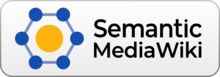

In [17]:
data

In [26]:
tables = data.find_all('tbody')
tables

[<tbody><tr>
 <th>Average Rank</th>
 <th>Film</th>
 <th>Year</th>
 <th>Rotten Tomatoes' Top 100<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup></th>
 <th>IMDb's Top 250 <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup></th>
 <th>Empire's Top 100 <sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></th>
 <th>AFI's Top 100 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></th>
 <th>BFI's Top 100 <sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[5]</a></sup>
 </th></tr>
 <tr>
 <td>1</td>
 <td>The Godfather</td>
 <td>1972</td>
 <td>17</td>
 <td>2</td>
 <td>3</td>
 <td>2</td>
 <td>21
 </td></tr>
 <tr>
 <td>2</td>
 <td>Citizen Kane</td>
 <td>1941</td>
 <td>2</td>
 <td>93</td>
 <td>40</td>
 <td>1</td>
 <td>2
 </td></tr>
 <tr>
 <td>3</td>
 <td>Casablanca</td>
 <td>1942</td>
 <td>8</td>
 <td>42</td>
 <td>33</td>
 <td>3</td>
 <td>84
 </td></tr>
 <tr>
 <td>4</td>
 <td>The Godfather, 

In [27]:
rows = tables[0].find_all('tr')

In [37]:
rows

[<tr>
 <th>Average Rank</th>
 <th>Film</th>
 <th>Year</th>
 <th>Rotten Tomatoes' Top 100<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup></th>
 <th>IMDb's Top 250 <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup></th>
 <th>Empire's Top 100 <sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></th>
 <th>AFI's Top 100 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></th>
 <th>BFI's Top 100 <sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[5]</a></sup>
 </th></tr>,
 <tr>
 <td>1</td>
 <td>The Godfather</td>
 <td>1972</td>
 <td>17</td>
 <td>2</td>
 <td>3</td>
 <td>2</td>
 <td>21
 </td></tr>,
 <tr>
 <td>2</td>
 <td>Citizen Kane</td>
 <td>1941</td>
 <td>2</td>
 <td>93</td>
 <td>40</td>
 <td>1</td>
 <td>2
 </td></tr>,
 <tr>
 <td>3</td>
 <td>Casablanca</td>
 <td>1942</td>
 <td>8</td>
 <td>42</td>
 <td>33</td>
 <td>3</td>
 <td>84
 </td></tr>,
 <tr>
 <td>4</td>
 <td>The Godfather, Par

In [77]:
for r in rows:
  if count<50:
    col = r.find_all('td')
    if len(col) != 0 :
      data_dict = { "Average Rank" : col[0].text.strip(),
                   "Film" : col[1].text.strip(),
                   "Year" : col[2].text.strip()}
      df1 = pd.DataFrame([data_dict])
      df = pd.concat([df,df1],ignore_index=True) #to ensure index is recalculated
      count+=1




In [78]:
#Debugging
for r in rows:
    print(r)
    col = r.find_all('td')
    print("col:", col)
    break

print(df)

<tr>
<th>Average Rank</th>
<th>Film</th>
<th>Year</th>
<th>Rotten Tomatoes' Top 100<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup></th>
<th>IMDb's Top 250 <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup></th>
<th>Empire's Top 100 <sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup></th>
<th>AFI's Top 100 <sup class="reference" id="cite_ref-4"><a href="#cite_note-4">[4]</a></sup></th>
<th>BFI's Top 100 <sup class="reference" id="cite_ref-5"><a href="#cite_note-5">[5]</a></sup>
</th></tr>
col: []
   Average Rank                                           Film  Year
0             1                                  The Godfather  1972
1             2                                   Citizen Kane  1941
2             3                                     Casablanca  1942
3             4                         The Godfather, Part II  1974
4             5                            Singin' in the Rain  1952
5       

In [93]:
df.to_csv(csv_path)

In [79]:
df.shape[0]
df.head()

,Average Rank,Film,Year
0,1,The Godfather,1972
1,2,Citizen Kane,1941
2,3,Casablanca,1942
3,4,"The Godfather, Part II",1974
4,5,Singin' in the Rain,1952


In [94]:
print(df.head())
print(df.dtypes)
df['Film'] = df['Film'].astype(str)
df['Year'] = df['Year'].astype(str)
df['Average Rank'] = df['Average Rank'].astype(str)

   Average Rank                    Film  Year
0             1           The Godfather  1972
1             2            Citizen Kane  1941
2             3              Casablanca  1942
3             4  The Godfather, Part II  1974
4             5     Singin' in the Rain  1952
Average Rank     int64
Film            object
Year             int64
dtype: object


In [102]:
#save the dataframe as a table, and then close the connection.
import os
#db_name = 'MOVIES.db'
table_name = 'Top_50'


In [103]:
df = pd.read_csv('/content/Top_50_films.csv',index_col=0)
conn = sqlite3.connect('movies.db')
df.to_sql(table_name,conn,if_exists= 'replace',index=False)
conn.commit()
conn.close()

In [104]:
!ls -lh movies.db

-rw-r--r-- 1 root root 8.0K Jun  8 13:05 movies.db


In [105]:
!sqlite3 movies.db "SELECT * FROM Top_50 LIMIT 5;"

/bin/bash: line 1: sqlite3: command not found


In [106]:
conn = sqlite3.connect('movies.db')
query = "SELECT * FROM Top_50 LIMIT 5;"
print(pd.read_sql(query, conn))
conn.close()


   Average Rank                    Film  Year
0             1           The Godfather  1972
1             2            Citizen Kane  1941
2             3              Casablanca  1942
3             4  The Godfather, Part II  1974
4             5     Singin' in the Rain  1952


**if_exists** parameter can take any one of three possible values:

'fail': This denies the creation of a table if one with the same name exists in the database already.

'replace': This overwrites the existing table with the same name.

'append': This adds information to the existing table with the same name.

'index' parameter set to True only if the index of the data being sent holds some informational value. Otherwise, keep it as False